In [26]:
# !pip install seaborn
# !pip freeze > requirements.txt


# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# # set this so the graphs open internally
# %matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

In [2]:
url='https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

### Step 3. Assign it to a variable called chipo.

In [3]:
chipo=pd.read_csv(url,sep='\t')

chipo.to_csv('chipotle.csv',index=False)

### Step 4. See the first 10 entries

In [5]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

C:\Users\amrit\AppData\Local\Temp\ipykernel_15924\1740205491.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top5=chipo.groupby('item_name').sum().sort_values('quantity',ascending=False).head(5)


item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64

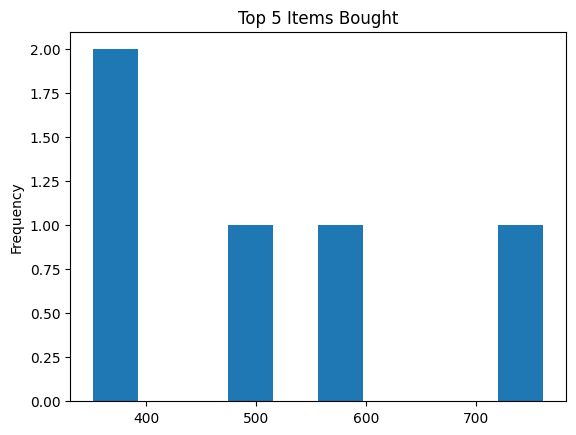

In [11]:
top5=chipo.groupby('item_name').sum().sort_values('quantity',ascending=False).head(5)
top5=top5['quantity']
top5.plot(kind='hist',title='Top 5 Items Bought')
top5

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [13]:
#connvert the item price to float
chipo.item_price=chipo.item_price.apply(lambda x: float(x[1:]))

In [21]:
orders.head()



,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70


C:\Users\amrit\AppData\Local\Temp\ipykernel_15924\3177996828.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  orders=chipo.groupby('order_id').sum()


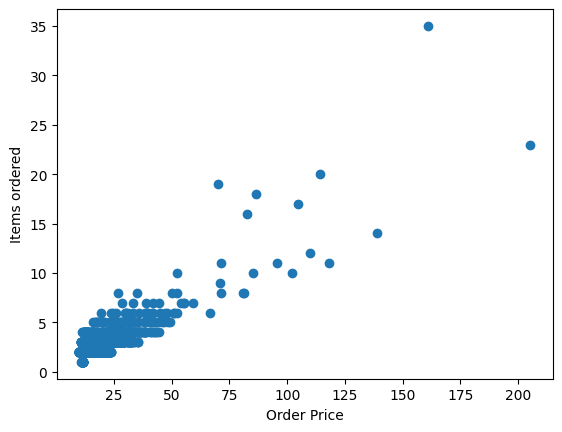

In [18]:
orders=chipo.groupby('order_id').sum()
plt.scatter(x=orders['item_price'],y=orders['quantity'])
plt.xlabel('Order Price')   
plt.ylabel('Items ordered')
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

C:\Users\amrit\AppData\Local\Temp\ipykernel_15924\1689231218.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  chipo.corr()
C:\Users\amrit\AppData\Local\Temp\ipykernel_15924\1689231218.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(chipo.corr(),cmap='coolwarm',annot=True,linewidths=1,linecolor='black',fmt='.2f')


<AxesSubplot: >

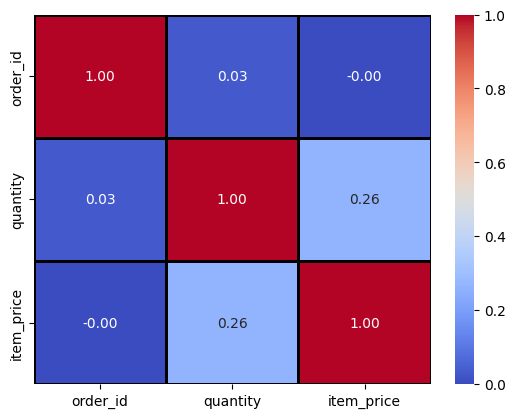

In [37]:
# correlation between  columns
chipo.corr()

#plot the correlation matrix
sns.heatmap(chipo.corr(),cmap='coolwarm',annot=True,linewidths=1,linecolor='black',fmt='.2f')


